<a href="https://colab.research.google.com/github/staniya8586/S.Taniya_EDA_Assignment-/blob/main/EDA_Optimising_NYC_Taxis_%3CS_TANIYA%3E_zip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings



In [1]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [6]:
# Try loading one file
df = pd.read_parquet("/content/drive/MyDrive/Datasets and Dictionary/trip_records/2023-1.parquet")
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [7]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [8]:
df.shape #NYC trip recod 2023-1 data set have 3041714 columns and 19 rows

(3041714, 19)

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [11]:
# from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data


# Select the folder having data files
os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        monthly_df = pd.read_csv(file_path)

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in monthly_df['tpep_pickup_datetime'].dt.date.unique():
            daily_data = monthly_df[monthly_df['tpep_pickup_datetime'].dt.date == date]


            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data = daily_data[daily_data['tpep_pickup_datetime'].dt.hour == hour]

                # Sample 5% of the hourly data randomly
                sample = hour_data.sample(frac=0.05, random_state=42)

                # Append the sampled data to the dataframe
                sampled_data = pd.concat([sampled_data, sample])




        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
os.chdir('/content/drive/MyDrive/Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in monthly_df['tpep_pickup_datetime'].dt.date.unique():
            daily_data = monthly_df[monthly_df['tpep_pickup_datetime'].dt.date == date]


            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_data = daily_data[daily_df['tpep_pickup_datetime'].dt.hour == hour]

                # Sample 5% of the hourly data randomly
                sample = hour_data.sample(frac=0.05, random_state=42)

                # Append the sampled data to the dataframe
                sampled_data = pd.concat([sampled_data, sample])




        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

NameError: name 'os' is not defined

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [16]:
# Load the new data file

df2=pd.read_parquet('/content/drive/MyDrive/Datasets and Dictionary/trip_records/2023-2.parquet')

In [17]:
df2.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2023-03-01 00:06:43,2023-03-01 00:16:43,1.0,0.00,1.0,N,238,42,2,8.6,1.0,0.5,0.00,0.0,1.0,11.10,0.0,0.00
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,52.7,6.0,0.5,12.54,0.0,1.0,76.49,2.5,1.25
2,1,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,1.0,N,140,186,1,18.4,3.5,0.5,4.65,0.0,1.0,28.05,2.5,0.00
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,15.6,3.5,0.5,4.10,0.0,1.0,24.70,2.5,0.00
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,7.2,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3374086 entries, 0 to 3403765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [19]:
  # Fix the index and drop any columns that are not needed.
  df2.reset_index(drop=True, inplace=True)

In [20]:
df2.drop(columns=['extra'], inplace=True)

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3374086 entries, 0 to 3374085
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  Airport_fee            float64       
dtypes: datetime64[us](2), 

In [22]:
df2.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2023-03-01 00:06:43,2023-03-01 00:16:43,1.0,0.00,1.0,N,238,42,2,8.6,0.5,0.00,0.0,1.0,11.10,0.0,0.00
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,52.7,0.5,12.54,0.0,1.0,76.49,2.5,1.25
2,1,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,1.0,N,140,186,1,18.4,0.5,4.65,0.0,1.0,28.05,2.5,0.00
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,15.6,0.5,4.10,0.0,1.0,24.70,2.5,0.00
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,7.2,0.5,2.44,0.0,1.0,14.64,2.5,0.00


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [23]:
# Combine the two airport fee columns
airport_fee_cols = [col for col in df.columns if "AirportFee" in col]
df2["AirportFee"] = df[airport_fee_cols].sum(axis=1)
df2.drop(columns=airport_fee_cols, inplace=True)
df2.head()



,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,AirportFee
0,2,2023-03-01 00:06:43,2023-03-01 00:16:43,1.0,0.00,1.0,N,238,42,2,8.6,0.5,0.00,0.0,1.0,11.10,0.0,0.00,0.0
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,52.7,0.5,12.54,0.0,1.0,76.49,2.5,1.25,0.0
2,1,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,1.0,N,140,186,1,18.4,0.5,4.65,0.0,1.0,28.05,2.5,0.00,0.0
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,15.6,0.5,4.10,0.0,1.0,24.70,2.5,0.00,0.0
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,7.2,0.5,2.44,0.0,1.0,14.64,2.5,0.00,0.0


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [24]:
# check where values of fare amount are negative
negative_fares = df2[df2['fare_amount'] < 0]
if not negative_fares.empty:
    print("Rows with negative fare amounts:")
    print(negative_fares.head())


In [25]:
negative_fares

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,AirportFee


Did you notice something different in the `RatecodeID` column for above records?

In [26]:
# Analyse RatecodeID for the negative fare amounts
ratecode_distribution = negative_fares['RatecodeID'].value_counts()
print(ratecode_distribution)


Series([], Name: count, dtype: int64)


In [27]:
# Find which columns have negative values
numeric_cols = negative_fares.select_dtypes(include=np.number).columns
negative_ratecode_cols = numeric_cols[negative_fares[numeric_cols].lt(0).any()].tolist()
print(negative_ratecode_cols)


[]


In [ ]:
# fix these negative values



### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [29]:
# Find the proportion of missing values in each column
df2.isnull().sum()


,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,87492
trip_distance,0
RatecodeID,87492
store_and_fwd_flag,87492
PULocationID,0
DOLocationID,0
payment_type,0


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [30]:
# Display the rows with null values
null_rows = df2[df2.isnull().any(axis=1)]
display(null_rows)



,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,AirportFee
132,2,2023-03-01 00:36:11,2023-03-01 00:49:55,1.0,3.47,1.0,N,48,262,1,17.70,0.5,0.00,0.0,1.0,22.70,2.5,0.0,NaN
263,2,2023-03-01 00:11:02,2023-03-01 00:24:57,3.0,3.11,1.0,N,114,230,1,16.30,0.5,5.32,0.0,1.0,26.62,2.5,0.0,NaN
324,1,2023-03-01 00:36:57,2023-03-01 00:43:16,1.0,1.50,1.0,N,79,45,1,9.30,0.5,2.85,0.0,1.0,17.15,2.5,0.0,NaN
620,1,2023-03-01 00:29:54,2023-03-01 00:38:49,1.0,2.30,1.0,N,170,140,1,12.10,0.5,1.00,0.0,1.0,18.10,2.5,0.0,NaN
923,2,2023-03-01 00:12:48,2023-03-01 00:33:25,1.0,5.99,1.0,N,249,75,1,27.50,0.5,6.50,0.0,1.0,39.00,2.5,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374081,2,2023-03-31 23:24:25,2023-03-31 23:40:54,NaN,3.16,NaN,None,163,75,0,12.13,0.5,4.23,0.0,1.0,20.36,NaN,NaN,NaN
3374082,2,2023-03-31 23:24:50,2023-04-01 00:04:12,NaN,6.89,NaN,None,125,198,0,40.92,0.5,8.98,0.0,1.0,53.90,NaN,NaN,NaN
3374083,2,2023-03-31 23:26:31,2023-03-31 23:49:39,NaN,4.01,NaN,None,50,224,0,24.02,0.5,0.00,0.0,1.0,28.02,NaN,NaN,NaN
3374084,2,2023-03-31 23:07:51,2023-03-31 23:15:56,NaN,1.31,NaN,None,113,158,0,8.51,0.5,3.50,0.0,1.0,16.01,NaN,NaN,NaN


In [31]:
 #Calculate the mode of 'passenger_count'
mode_passenger_count = df2['passenger_count'].mode()[0]

In [32]:
# Impute NaN values in 'passenger_count'
df2['passenger_count'].fillna(mode_passenger_count, inplace=True)


<ipython-input-32-89942c9faed6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['passenger_count'].fillna(mode_passenger_count, inplace=True)


In [33]:
mode_passenger_count

1.0

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [34]:
# Fix missing values in 'RatecodeID'
missing_values_before = df2['RatecodeID'].isnull().sum()

In [35]:
missing_values_before

87492

In [36]:
# Fill missing values with the most frequent value (mode) or a default value (e.g., 1 for standard rate)
mode_value = df2['RatecodeID'].mode()[0]


In [38]:
df2['RatecodeID'].fillna(mode_value, inplace=True)

<ipython-input-38-4c1f67a105f5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['RatecodeID'].fillna(mode_value, inplace=True)


In [37]:
# Check missing values after fixing
missing_values_after = df2['RatecodeID'].isnull().sum()

In [39]:
missing_values_after


87492

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [40]:
# handle null values in congestion_surcharge
df2['congestion_surcharge'].fillna(0, inplace=True)

<ipython-input-40-ce731ac74c7e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['congestion_surcharge'].fillna(0, inplace=True)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [41]:
# Handle any remaining missing values
# Impute missing values for numeric columns with the median
numeric_cols = df2.select_dtypes(include=np.number).columns
df2[numeric_cols] = df2[numeric_cols].fillna(df2[numeric_cols].median())



In [42]:
# Impute missing values for categorical columns with the mode
categorical_cols = df2.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    mode_value = df2[col].mode()[0]
    df2[col] = df2[col].fillna(mode_value)
    mode_value = df2[col].mode()[0]
    df2[col] = df2[col].fillna(mode_value)

In [43]:
#Drop rows with any remaining missing values (if any)
df2.dropna(inplace=True)

In [44]:
df2.dropna()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,AirportFee
0,2,2023-03-01 00:06:43,2023-03-01 00:16:43,1.0,0.00,1.0,N,238,42,2,8.60,0.5,0.00,0.0,1.0,11.10,0.0,0.00,0.0
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,52.70,0.5,12.54,0.0,1.0,76.49,2.5,1.25,0.0
2,1,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,1.0,N,140,186,1,18.40,0.5,4.65,0.0,1.0,28.05,2.5,0.00,0.0
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,15.60,0.5,4.10,0.0,1.0,24.70,2.5,0.00,0.0
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,7.20,0.5,2.44,0.0,1.0,14.64,2.5,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374081,2,2023-03-31 23:24:25,2023-03-31 23:40:54,1.0,3.16,1.0,N,163,75,0,12.13,0.5,4.23,0.0,1.0,20.36,0.0,0.00,0.0
3374082,2,2023-03-31 23:24:50,2023-04-01 00:04:12,1.0,6.89,1.0,N,125,198,0,40.92,0.5,8.98,0.0,1.0,53.90,0.0,0.00,0.0
3374083,2,2023-03-31 23:26:31,2023-03-31 23:49:39,1.0,4.01,1.0,N,50,224,0,24.02,0.5,0.00,0.0,1.0,28.02,0.0,0.00,0.0
3374084,2,2023-03-31 23:07:51,2023-03-31 23:15:56,1.0,1.31,1.0,N,113,158,0,8.51,0.5,3.50,0.0,1.0,16.01,0.0,0.00,0.0


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

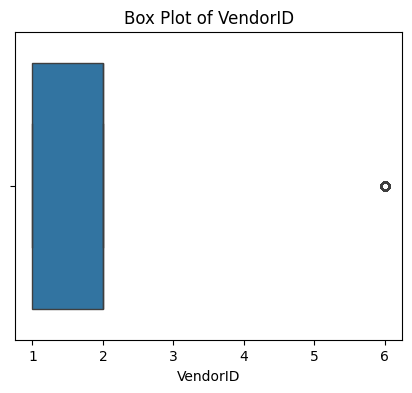

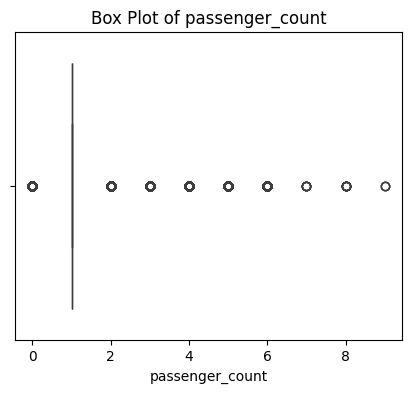

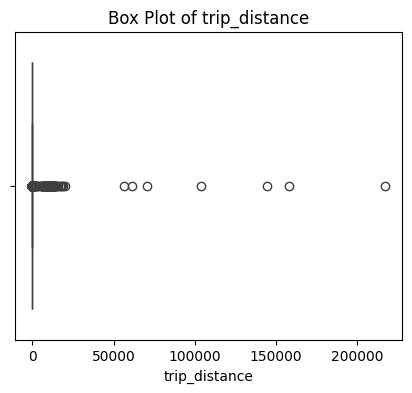

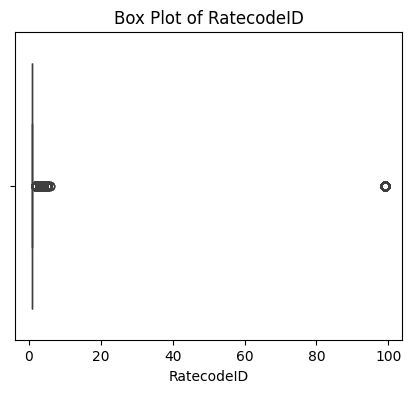

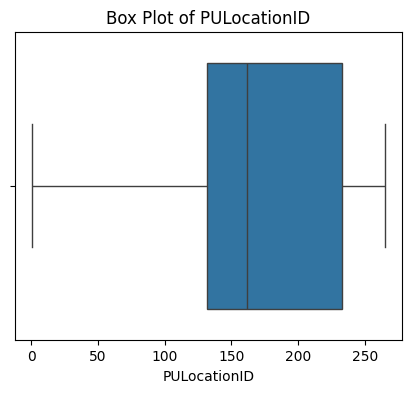

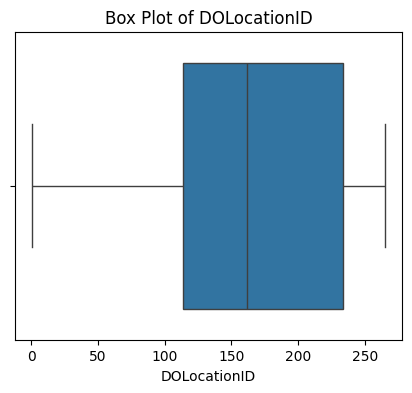

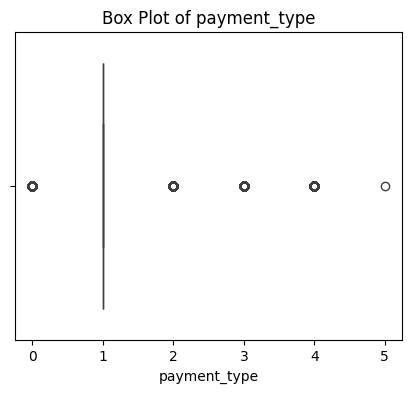

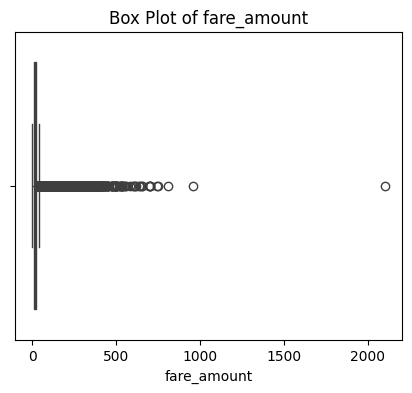

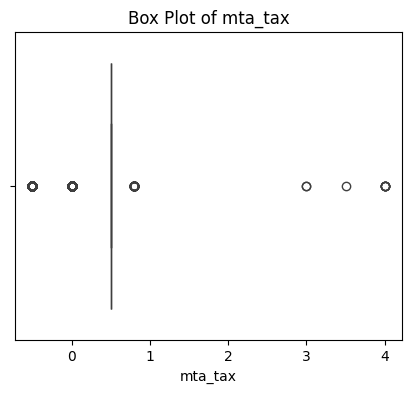

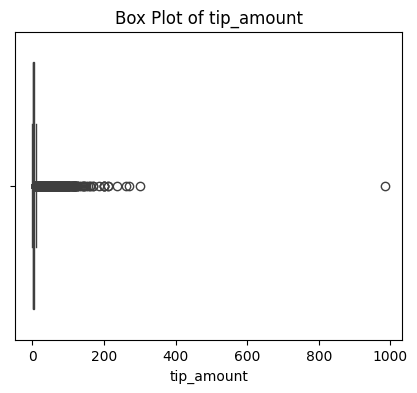

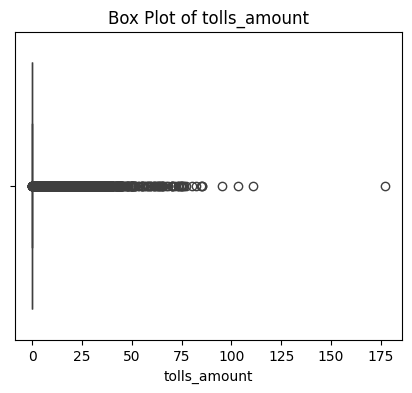

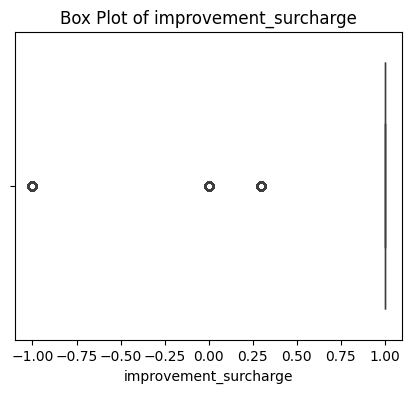

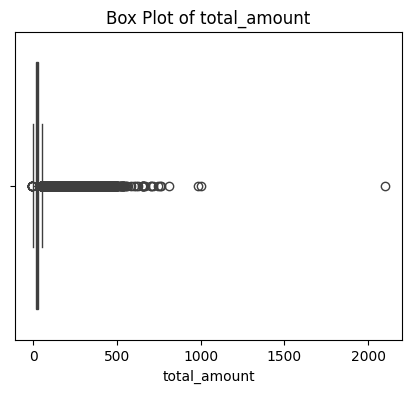

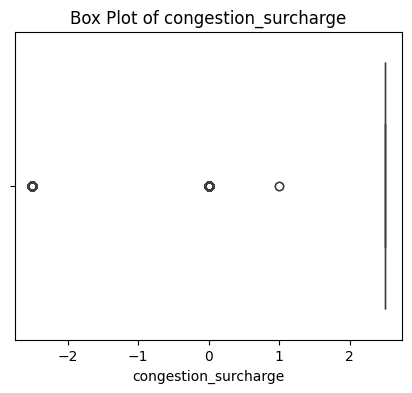

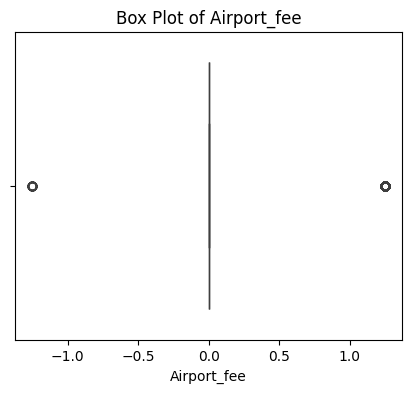

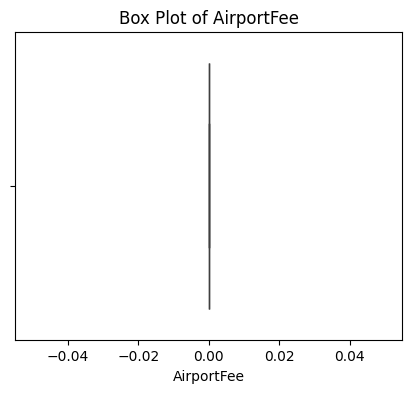

In [45]:
# Describe the data and check if there are any potential outliers present4
for column in df2.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(5, 4))
    sns.boxplot(x=df2[column])
    plt.title(f'Box Plot of {column}')
    plt.show()


In [46]:
# Check for potential out of place values in various columns
df2.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,AirportFee
count,3.374086e+06,3374086,3374086,3.374086e+06,3.374086e+06,3.374086e+06,3.374086e+06,3.374086e+06,3.374086e+06,3.374086e+06,3.374086e+06,3.374086e+06,3.374086e+06,3.374086e+06,3.374086e+06,3.374086e+06,3.374086e+06,3374086.0
mean,1.722904e+00,2023-03-16 11:31:05.895279,2023-03-16 11:48:01.507517,1.342498e+00,3.908189e+00,1.611780e+00,1.654941e+02,1.641515e+02,1.168427e+00,1.924612e+01,4.959805e-01,3.525296e+00,5.762923e-01,9.984126e-01,2.826384e+01,2.253402e+00,1.036069e-01,0.0
min,1.000000e+00,2001-01-01 00:06:49,2001-01-01 14:13:51,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-5.000000e-01,0.000000e+00,0.000000e+00,-1.000000e+00,-5.250000e+00,-2.500000e+00,-1.250000e+00,0.0
25%,1.000000e+00,2023-03-08 18:46:06,2023-03-08 19:03:03.250000,1.000000e+00,1.060000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.595000e+01,2.500000e+00,0.000000e+00,0.0
50%,2.000000e+00,2023-03-16 12:16:45.500000,2023-03-16 12:36:12.500000,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,5.000000e-01,2.850000e+00,0.000000e+00,1.000000e+00,2.064000e+01,2.500000e+00,0.000000e+00,0.0
75%,2.000000e+00,2023-03-24 08:55:10,2023-03-24 09:10:49.500000,1.000000e+00,3.390000e+00,1.000000e+00,2.330000e+02,2.340000e+02,1.000000e+00,2.120000e+01,5.000000e-01,4.340000e+00,0.000000e+00,1.000000e+00,2.985000e+01,2.500000e+00,0.000000e+00,0.0
max,6.000000e+00,2023-04-05 20:17:42,2023-04-05 20:35:28,9.000000e+00,2.169870e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,2.100000e+03,4.000000e+00,9.843000e+02,1.770000e+02,1.000000e+00,2.100000e+03,2.500000e+00,1.250000e+00,0.0
std,4.601545e-01,NaN,NaN,8.776061e-01,1.923958e+02,7.295566e+00,6.374159e+01,6.967037e+01,4.894928e-01,1.781702e+01,4.529650e-02,3.997656e+00,2.117523e+00,3.815302e-02,2.229215e+01,7.457302e-01,3.446876e-01,0.0


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [47]:
# remove passenger_count > 6
df2 = df2[df2['passenger_count'] <= 6]


In [48]:
df2


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,AirportFee
0,2,2023-03-01 00:06:43,2023-03-01 00:16:43,1.0,0.00,1.0,N,238,42,2,8.60,0.5,0.00,0.0,1.0,11.10,0.0,0.00,0.0
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,52.70,0.5,12.54,0.0,1.0,76.49,2.5,1.25,0.0
2,1,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,1.0,N,140,186,1,18.40,0.5,4.65,0.0,1.0,28.05,2.5,0.00,0.0
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,15.60,0.5,4.10,0.0,1.0,24.70,2.5,0.00,0.0
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,7.20,0.5,2.44,0.0,1.0,14.64,2.5,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374081,2,2023-03-31 23:24:25,2023-03-31 23:40:54,1.0,3.16,1.0,N,163,75,0,12.13,0.5,4.23,0.0,1.0,20.36,0.0,0.00,0.0
3374082,2,2023-03-31 23:24:50,2023-04-01 00:04:12,1.0,6.89,1.0,N,125,198,0,40.92,0.5,8.98,0.0,1.0,53.90,0.0,0.00,0.0
3374083,2,2023-03-31 23:26:31,2023-03-31 23:49:39,1.0,4.01,1.0,N,50,224,0,24.02,0.5,0.00,0.0,1.0,28.02,0.0,0.00,0.0
3374084,2,2023-03-31 23:07:51,2023-03-31 23:15:56,1.0,1.31,1.0,N,113,158,0,8.51,0.5,3.50,0.0,1.0,16.01,0.0,0.00,0.0


In [ ]:
#Entries where trip_distance is nearly 0 and fare_amount is more than 300:
df2 = df2[~((df2['trip_distance'] < 0.1) & (df2['fare_amount'] > 300))]


In [ ]:
df2

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,AirportFee
0,2,2023-03-01 00:06:43,2023-03-01 00:16:43,1.0,0.00,1.0,N,238,42,2,8.60,0.5,0.00,0.0,1.0,11.10,0.0,0.00,0.0
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,52.70,0.5,12.54,0.0,1.0,76.49,2.5,1.25,0.0
2,1,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,1.0,N,140,186,1,18.40,0.5,4.65,0.0,1.0,28.05,2.5,0.00,0.0
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,15.60,0.5,4.10,0.0,1.0,24.70,2.5,0.00,0.0
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,7.20,0.5,2.44,0.0,1.0,14.64,2.5,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374081,2,2023-03-31 23:24:25,2023-03-31 23:40:54,1.0,3.16,1.0,N,163,75,0,12.13,0.5,4.23,0.0,1.0,20.36,0.0,0.00,0.0
3374082,2,2023-03-31 23:24:50,2023-04-01 00:04:12,1.0,6.89,1.0,N,125,198,0,40.92,0.5,8.98,0.0,1.0,53.90,0.0,0.00,0.0
3374083,2,2023-03-31 23:26:31,2023-03-31 23:49:39,1.0,4.01,1.0,N,50,224,0,24.02,0.5,0.00,0.0,1.0,28.02,0.0,0.00,0.0
3374084,2,2023-03-31 23:07:51,2023-03-31 23:15:56,1.0,1.31,1.0,N,113,158,0,8.51,0.5,3.50,0.0,1.0,16.01,0.0,0.00,0.0


In [49]:
# Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different:
df2 = df2[~((df2['trip_distance'] == 0) & (df2['fare_amount'] == 0) & (df2['PULocationID'] != df2['DOLocationID']))]

In [50]:
df2

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,AirportFee
0,2,2023-03-01 00:06:43,2023-03-01 00:16:43,1.0,0.00,1.0,N,238,42,2,8.60,0.5,0.00,0.0,1.0,11.10,0.0,0.00,0.0
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,52.70,0.5,12.54,0.0,1.0,76.49,2.5,1.25,0.0
2,1,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,1.0,N,140,186,1,18.40,0.5,4.65,0.0,1.0,28.05,2.5,0.00,0.0
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,15.60,0.5,4.10,0.0,1.0,24.70,2.5,0.00,0.0
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,7.20,0.5,2.44,0.0,1.0,14.64,2.5,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374081,2,2023-03-31 23:24:25,2023-03-31 23:40:54,1.0,3.16,1.0,N,163,75,0,12.13,0.5,4.23,0.0,1.0,20.36,0.0,0.00,0.0
3374082,2,2023-03-31 23:24:50,2023-04-01 00:04:12,1.0,6.89,1.0,N,125,198,0,40.92,0.5,8.98,0.0,1.0,53.90,0.0,0.00,0.0
3374083,2,2023-03-31 23:26:31,2023-03-31 23:49:39,1.0,4.01,1.0,N,50,224,0,24.02,0.5,0.00,0.0,1.0,28.02,0.0,0.00,0.0
3374084,2,2023-03-31 23:07:51,2023-03-31 23:15:56,1.0,1.31,1.0,N,113,158,0,8.51,0.5,3.50,0.0,1.0,16.01,0.0,0.00,0.0


In [51]:
# Entries where payment_type is 0:
df2 = df2[df2['payment_type'] != 0]


In [52]:
df2

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,AirportFee
0,2,2023-03-01 00:06:43,2023-03-01 00:16:43,1.0,0.00,1.0,N,238,42,2,8.6,0.5,0.00,0.0,1.0,11.10,0.0,0.00,0.0
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,52.7,0.5,12.54,0.0,1.0,76.49,2.5,1.25,0.0
2,1,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,1.0,N,140,186,1,18.4,0.5,4.65,0.0,1.0,28.05,2.5,0.00,0.0
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,15.6,0.5,4.10,0.0,1.0,24.70,2.5,0.00,0.0
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,7.2,0.5,2.44,0.0,1.0,14.64,2.5,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3286589,2,2023-03-31 23:56:39,2023-04-01 00:04:40,1.0,2.01,1.0,N,236,142,1,11.4,0.5,3.28,0.0,1.0,19.68,2.5,0.00,0.0
3286590,2,2023-03-31 23:03:04,2023-03-31 23:05:49,1.0,0.36,1.0,N,48,48,1,5.1,0.5,2.02,0.0,1.0,12.12,2.5,0.00,0.0
3286591,2,2023-03-31 23:18:13,2023-03-31 23:35:07,3.0,1.68,1.0,N,68,114,1,15.6,0.5,4.12,0.0,1.0,24.72,2.5,0.00,0.0
3286592,2,2023-03-31 23:36:02,2023-03-31 23:44:47,1.0,1.50,1.0,N,114,137,1,10.7,0.5,2.00,0.0,1.0,17.70,2.5,0.00,0.0


In [53]:
# Continue with outlier handling

In [54]:
# Do any columns need standardising?



## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [55]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [56]:
df2['pickup_hour'] = pd.to_datetime(df2['tpep_pickup_datetime']).dt.hour

<ipython-input-56-c63ff186e082>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['pickup_hour'] = pd.to_datetime(df2['tpep_pickup_datetime']).dt.hour


In [57]:
Hourly_pickups = df2.groupby('pickup_hour')['VendorID'].count().reset_index()

In [58]:
Hourly_pickups.rename(columns={'VendorID': 'pickup_count'}, inplace=True)

In [59]:
Hourly_pickups

,pickup_hour,pickup_count
0,0,88649
1,1,58186
2,2,33713
3,3,25401
4,4,16500
5,5,17863
6,6,44808
7,7,90713
8,8,126659
9,9,142416


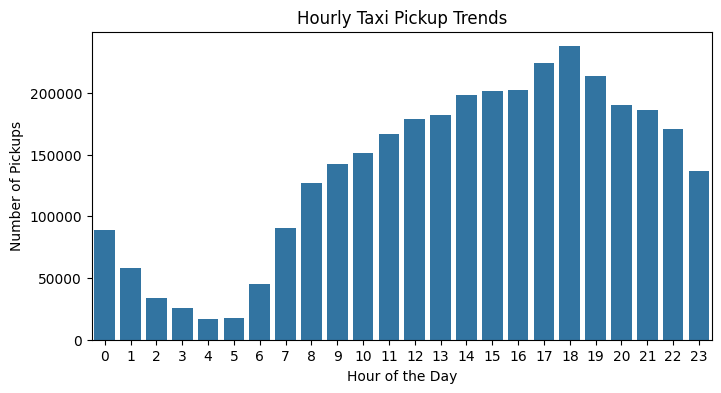

In [60]:
# Find and show the hourly trends in taxi pickups
plt.figure(figsize=(8, 4))
sns.barplot(x='pickup_hour', y='pickup_count', data=Hourly_pickups) # Changed hourly_pickups to Hourly_pickups
plt.title('Hourly Taxi Pickup Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(24))  # Set x-axis ticks for each hour
plt.show()


In [62]:
df2['pickup_day'] = pd.to_datetime(df2['tpep_pickup_datetime']).dt.day_name()

<ipython-input-62-b43a808bbe7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['pickup_day'] = pd.to_datetime(df2['tpep_pickup_datetime']).dt.day_name()


In [63]:
daily_pickups = df2.groupby('pickup_day')['VendorID'].count().reset_index()

In [ ]:
daily_pickups

,pickup_day,VendorID
0,Friday,555992
1,Monday,368530
2,Saturday,444593
3,Sunday,373098
4,Thursday,578080
5,Tuesday,413438
6,Wednesday,552658


In [64]:
#First create a column called 'pickup_count' in the dataframe daily_pickups using rename()
daily_pickups.rename(columns={'VendorID': 'pickup_count'}, inplace=True)


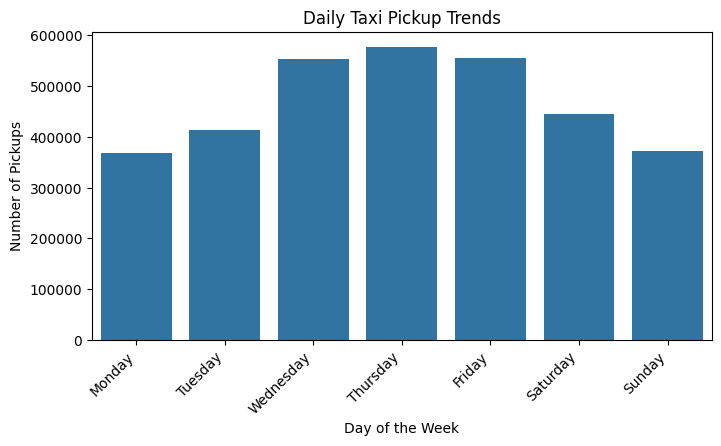

In [65]:
# Find and show the daily trends in taxi pickups (days of the week)
plt.figure(figsize=(8, 4))
sns.barplot(x='pickup_day', y='pickup_count', data=daily_pickups, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Daily Taxi Pickup Trends')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45, ha='right')
plt.show()


In [66]:
# Extract the month from the 'tpep_pickup_datetime' column
df2['pickup_month'] = pd.to_datetime(df2['tpep_pickup_datetime']).dt.month


<ipython-input-66-4019d1b363e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['pickup_month'] = pd.to_datetime(df2['tpep_pickup_datetime']).dt.month


In [67]:
 #Group the data by month and count the number of pickups
monthly_pickups = df2.groupby('pickup_month')['VendorID'].count().reset_index()
monthly_pickups.rename(columns={'VendorID': 'pickup_count'}, inplace=True)  # Rename the column for clarity

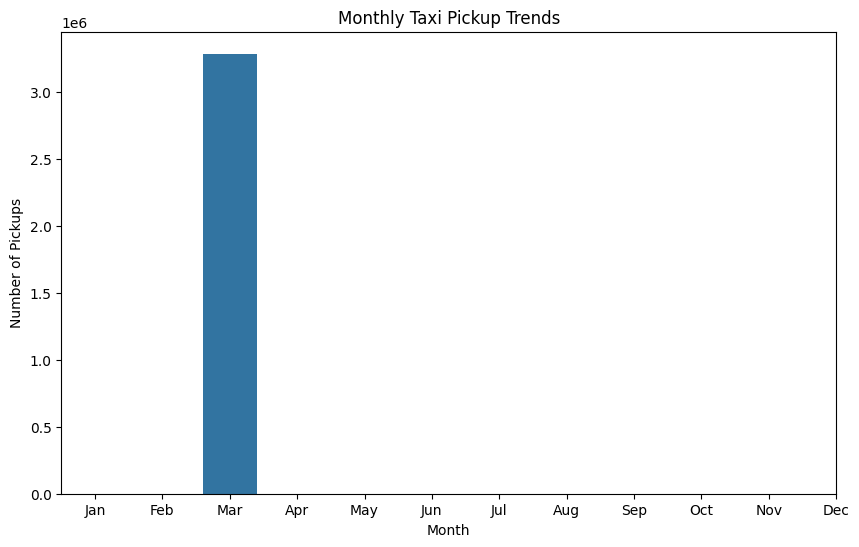

In [68]:
# Show the monthly trends in pickups
plt.figure(figsize=(10, 6))
sns.barplot(x='pickup_month', y='pickup_count', data=monthly_pickups)
plt.title('Monthly Taxi Pickup Trends')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set x-axis labels
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [69]:
# Analyse the above parameters
# Check for zero values
zero_values = df2[(df2['fare_amount'] == 0) | (df2['tip_amount'] == 0) | (df2['total_amount'] == 0) | (df2['trip_distance'] == 0)]


In [70]:
 #Check for negative values
negative_values = df2[(df2['fare_amount'] < 0) | (df2['tip_amount'] < 0) | (df2['total_amount'] < 0) | (df2['trip_distance'] < 0)]


In [71]:
# Print the results
print("Zero values:")
print(zero_values.shape[0])
print("\nNegative values:")
print(negative_values.shape[0])

Zero values:
729965

Negative values:
158


In [72]:
 #Create a copy DataFrame without zero values
df_no_zeros = df2[(df2['fare_amount'] != 0) & (df2['tip_amount'] != 0) & (df2['total_amount'] != 0) & (df2['trip_distance'] != 0)].copy()

In [73]:
print(df_no_zeros.shape)

(2556480, 22)


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**Yes it is beneficial to create a copy of DataFrame without leaving out the zero values because it helps for accurate analysis and also improve data quality**

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [75]:
# Create a df with non zero entries for the selected parameters.
filtered_df = df_no_zeros[~((df_no_zeros['trip_distance'] == 0) & (df_no_zeros['PULocationID'] != df_no_zeros['DOLocationID']))]



In [76]:
filtered_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,AirportFee,pickup_hour,pickup_day,pickup_month
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,...,12.54,0.0,1.0,76.49,2.5,1.25,0.0,0,Wednesday,3
2,1,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,1.0,N,140,186,1,...,4.65,0.0,1.0,28.05,2.5,0.00,0.0,0,Wednesday,3
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,...,4.10,0.0,1.0,24.70,2.5,0.00,0.0,0,Wednesday,3
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,...,2.44,0.0,1.0,14.64,2.5,0.00,0.0,0,Wednesday,3
5,1,2023-03-01 00:09:09,2023-03-01 00:17:34,1.0,1.20,1.0,N,162,137,1,...,3.00,0.0,1.0,18.00,2.5,0.00,0.0,0,Wednesday,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3286589,2,2023-03-31 23:56:39,2023-04-01 00:04:40,1.0,2.01,1.0,N,236,142,1,...,3.28,0.0,1.0,19.68,2.5,0.00,0.0,23,Friday,3
3286590,2,2023-03-31 23:03:04,2023-03-31 23:05:49,1.0,0.36,1.0,N,48,48,1,...,2.02,0.0,1.0,12.12,2.5,0.00,0.0,23,Friday,3
3286591,2,2023-03-31 23:18:13,2023-03-31 23:35:07,3.0,1.68,1.0,N,68,114,1,...,4.12,0.0,1.0,24.72,2.5,0.00,0.0,23,Friday,3
3286592,2,2023-03-31 23:36:02,2023-03-31 23:44:47,1.0,1.50,1.0,N,114,137,1,...,2.00,0.0,1.0,17.70,2.5,0.00,0.0,23,Friday,3


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [77]:
# Group data by month and analyse monthly revenued
df2['pickup_month'] = pd.to_datetime(df2['tpep_pickup_datetime']).dt.month
monthly_revenue = df2.groupby('pickup_month')['total_amount'].sum().reset_index()
monthly_revenue.rename(columns={'total_amount': 'revenue'}, inplace=True)

<ipython-input-77-494319650025>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['pickup_month'] = pd.to_datetime(df2['tpep_pickup_datetime']).dt.month


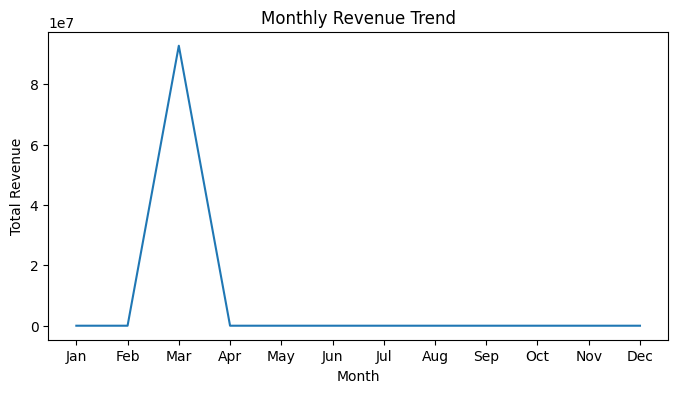

In [78]:
plt.figure(figsize=(8, 4))
sns.lineplot(x='pickup_month', y='revenue', data=monthly_revenue)
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [79]:
# Calculate proportion of each quarter
def get_quarter(month):
    if month in [1, 2, 3]:
        return 1
    elif month in [4, 5, 6]:
        return 2
    elif month in [7, 8, 9]:
        return 3
    else:
        return 4
#Calculate quarterly revenue
df2['quarter'] = df2['pickup_month'].apply(get_quarter)
quarter_revenue = df2.groupby('quarter')['total_amount'].sum().reset_index()
quarter_revenue



<ipython-input-79-29342da834d1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['quarter'] = df2['pickup_month'].apply(get_quarter)


,quarter,total_amount
0,1,92763398.37
1,2,2192.84
2,4,235.58


In [80]:
#Calculate proportion of quarterly revenue.
# Changed 'quarterly_revenue' to 'quarter_revenue' to match the variable name from the previous cell
total_revenue = quarter_revenue['total_amount'].sum()
quarter_proportions = quarter_revenue['total_amount'] / total_revenue


In [81]:
total_revenue

92765826.79

In [ ]:
quarter_proportions


,total_amount
0,0.999974
1,0.000024
2,0.000003


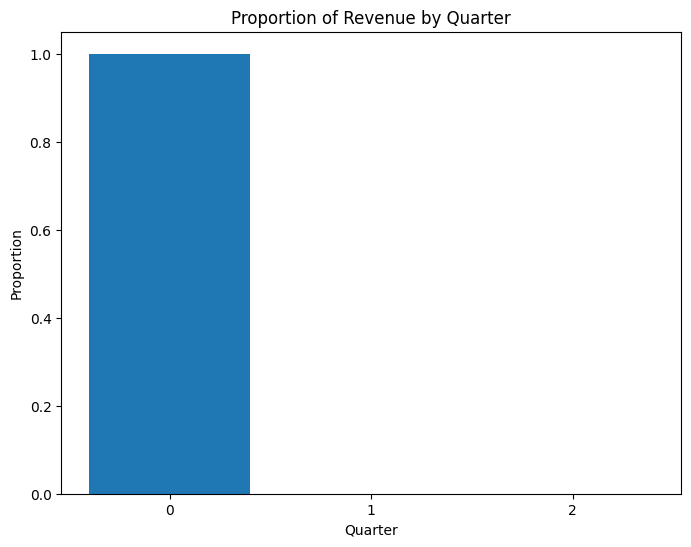

In [82]:
# Create a bar plot to visualize the proportions
plt.figure(figsize=(8, 6))
plt.bar(quarter_proportions.index, quarter_proportions.values)
plt.title('Proportion of Revenue by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Proportion')
plt.xticks(quarter_proportions.index)
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [83]:
# Calculate the correlation
correlation = df2['trip_distance'].corr(df2['fare_amount'])
print(f"Correlation between trip distance and fare amount: {correlation}")

Correlation between trip distance and fare amount: 0.1463643552380973


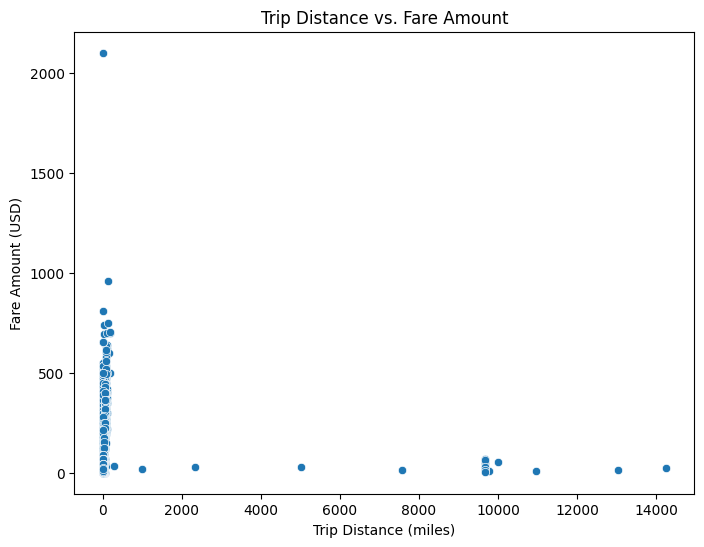

In [84]:
# Show how trip fare is affected by distance
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.scatterplot(x='trip_distance', y='fare_amount', data=df2)  # Create scatter plot
plt.title('Trip Distance vs. Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount (USD)')
plt.show()




**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [85]:
#Calculate Trip Duration
df2['trip_duration'] = (pd.to_datetime(df2['tpep_dropoff_datetime']) - pd.to_datetime(df2['tpep_pickup_datetime'])).dt.total_seconds() / 60


<ipython-input-85-71cebebb5056>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['trip_duration'] = (pd.to_datetime(df2['tpep_dropoff_datetime']) - pd.to_datetime(df2['tpep_pickup_datetime'])).dt.total_seconds() / 60


In [86]:
#Show relationship between fare and trip duration
correlation_duration = df2['fare_amount'].corr(df2['trip_duration'])
print(f"Correlation between fare amount and trip duration: {correlation_duration}")


Correlation between fare amount and trip duration: 0.2377381797456838


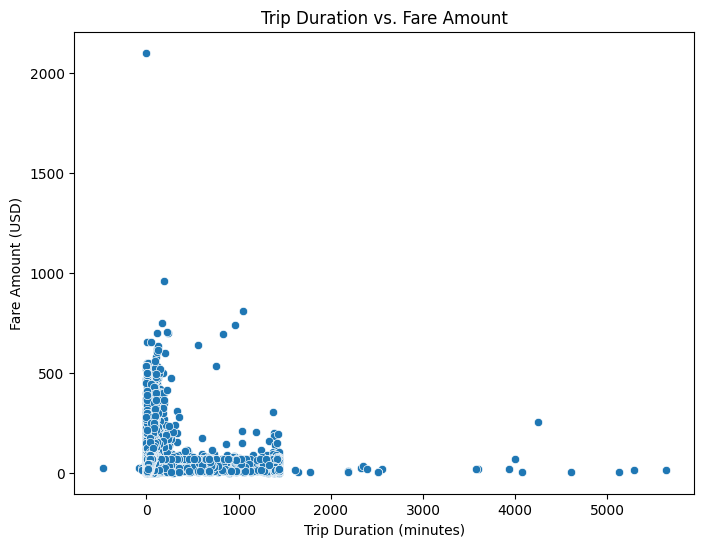

In [87]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=df2)
plt.title('Trip Duration vs. Fare Amount')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount (USD)')
plt.show()

In [88]:
# Show relationship between fare and number of passengers
correlation_fare_passenger = df2['fare_amount'].corr(df2['passenger_count'])
print(f"Correlation between fare amount and passenger count: {correlation_fare_passenger}")


Correlation between fare amount and passenger count: 0.0341688027478665


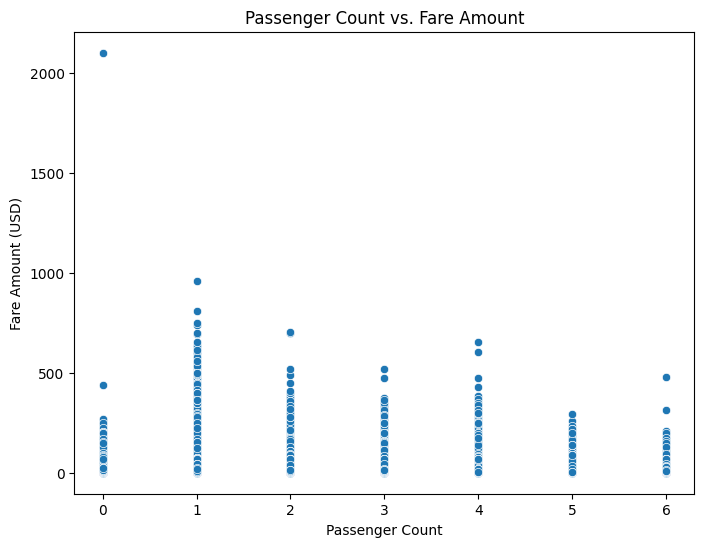

In [89]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='passenger_count', y='fare_amount', data=df2)
plt.title('Passenger Count vs. Fare Amount')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount (USD)')
plt.show()

In [90]:
# Show relationship between tip and trip distance
correlation_tip_distance = df2['tip_amount'].corr(df2['trip_distance'])
print(f"Correlation between tip amount and trip distance: {correlation_tip_distance}")



Correlation between tip amount and trip distance: 0.09341507250700937


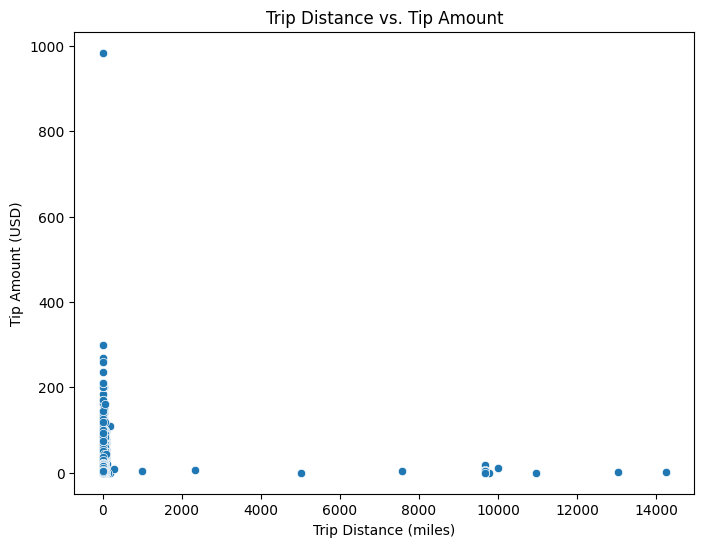

In [91]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df2)
plt.title('Trip Distance vs. Tip Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount (USD)')
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [92]:
# Analyse the distribution of different payment types (payment_type).
payment_type_counts = df2['payment_type'].value_counts()

In [93]:
payment_type_counts

,count
payment_type,
1,2689772
2,559130
4,21419
3,16123
5,1


In [94]:
#proportion of each payment type
payment_type_proportions = payment_type_counts / len(df2)


In [95]:
payment_type_proportions

,count
payment_type,
1,8.184442e-01
2,1.701322e-01
4,6.517377e-03
3,4.905909e-03
5,3.042802e-07


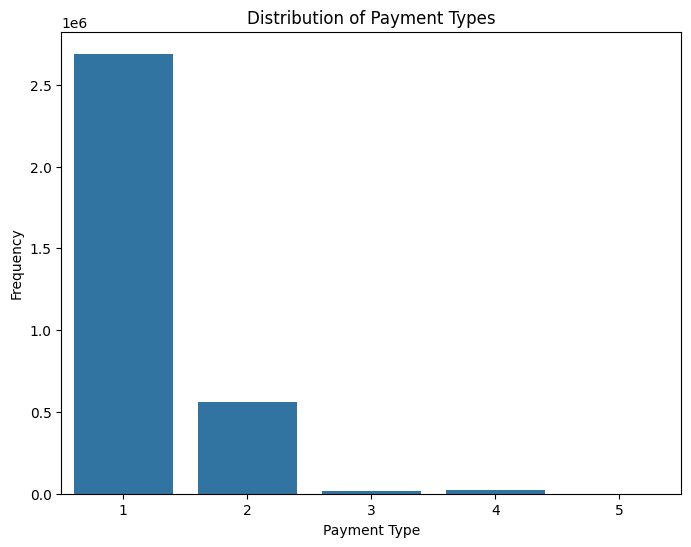

In [96]:
#A bar plot to visualize the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='payment_type', data=df2)
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Frequency')
plt.show()

##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [97]:
import geopandas as gpd
import matplotlib.pyplot as plt

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [98]:
# import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('/content/drive/MyDrive/Datasets and Dictionary/taxi_zones/taxi_zones.shp') # Changed pd.read.shp to gpd.read_file and corrected the file path
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

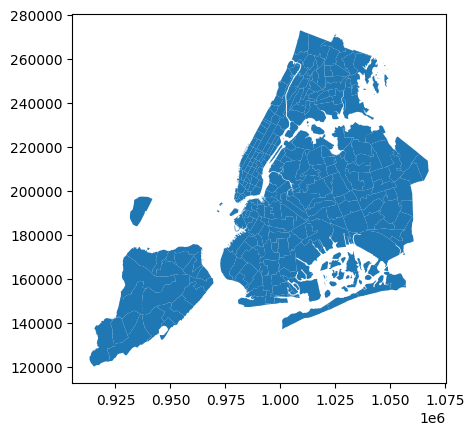

In [99]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [100]:
# Merge zones and trip records using locationID and PULocationID
trips_with_zones = pd.merge(df2, zones, left_on='PULocationID', right_on='LocationID', how='left')

In [101]:
trips_with_zones

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_month,quarter,trip_duration,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-03-01 00:06:43,2023-03-01 00:16:43,1.0,0.00,1.0,N,238,42,2,...,3,1,10.000000,238.0,0.060109,0.000185,Upper West Side North,238.0,Manhattan,"POLYGON ((992877.88 225627.534, 992741.735 225..."
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,...,3,1,31.083333,138.0,0.107467,0.000537,LaGuardia Airport,138.0,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031..."
2,1,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,1.0,N,140,186,1,...,3,1,14.366667,140.0,0.047584,0.000114,Lenox Hill East,140.0,Manhattan,"POLYGON ((995735.062 215619.835, 995670.105 21..."
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,...,3,1,11.466667,140.0,0.047584,0.000114,Lenox Hill East,140.0,Manhattan,"POLYGON ((995735.062 215619.835, 995670.105 21..."
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,...,3,1,3.033333,79.0,0.042625,0.000108,East Village,79.0,Manhattan,"POLYGON ((988746.067 202151.955, 988733.885 20..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3286664,2,2023-03-31 23:56:39,2023-04-01 00:04:40,1.0,2.01,1.0,N,236,142,1,...,3,1,8.016667,236.0,0.044252,0.000103,Upper East Side North,236.0,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220..."
3286665,2,2023-03-31 23:03:04,2023-03-31 23:05:49,1.0,0.36,1.0,N,48,48,1,...,3,1,2.750000,48.0,0.043747,0.000094,Clinton East,48.0,Manhattan,"POLYGON ((986694.313 214463.846, 986568.184 21..."
3286666,2,2023-03-31 23:18:13,2023-03-31 23:35:07,3.0,1.68,1.0,N,68,114,1,...,3,1,16.900000,68.0,0.049337,0.000111,East Chelsea,68.0,Manhattan,"POLYGON ((983690.405 209040.369, 983550.612 20..."
3286667,2,2023-03-31 23:36:02,2023-03-31 23:44:47,1.0,1.50,1.0,N,114,137,1,...,3,1,8.750000,114.0,0.031727,0.000047,Greenwich Village South,114.0,Manhattan,"POLYGON ((986306.712 203122.786, 986300.242 20..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [102]:
# Group data by location and calculate the number of trips
trips_by_location = df2.groupby('PULocationID')

In [103]:
print(trips_by_location)

In [104]:
trip_counts = trips_by_location.size().reset_index(name='trip_count')

In [105]:
print(trip_counts)

     PULocationID  trip_count
0               1         406
1               2           3
2               3          59
3               4        3233
4               5          53
..            ...         ...
256           261       15660
257           262       42760
258           263       64795
259           264       30361
260           265        1564

[261 rows x 2 columns]


In [106]:
trips_by_location = df2.groupby('PULocationID')
trip_counts = trips_by_location.size().reset_index(name='trip_count')
print(trip_counts)

     PULocationID  trip_count
0               1         406
1               2           3
2               3          59
3               4        3233
4               5          53
..            ...         ...
256           261       15660
257           262       42760
258           263       64795
259           264       30361
260           265        1564

[261 rows x 2 columns]


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [107]:
# Merge trip counts back to the zones GeoDataFrame
zones_with_trips = pd.merge(zones, trip_counts, left_on='LocationID', right_on='PULocationID', how='left')
zones_with_trips.drop(columns=['PULocationID'], inplace=True)


In [108]:
zones_with_trips.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trip_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",406.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",3.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",59.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",3233.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",53.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

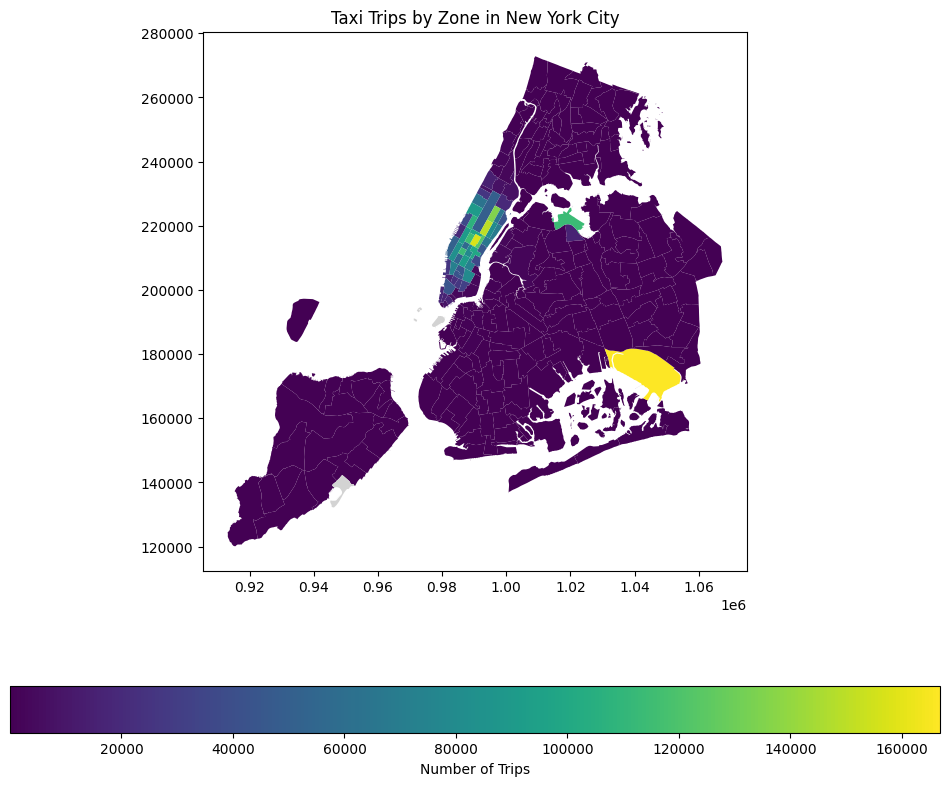

In [109]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
# Plot the GeoDataFrame with color-coding based on trip counts
zones_with_trips.plot(
    column="trip_count",  # Column to use for color-coding
    ax=ax,  # Axis to plot on
    legend=True,  # Display a legend
    legend_kwds={
        "label": "Number of Trips",  # Legend label
        "orientation": "horizontal",  # Legend orientation
    },
    cmap="viridis",  # Colormap to use (you can choose others)
    missing_kwds={
        "color": "lightgrey",  # Color for missing values
        "label": "Missing Values",  # Label for missing values
    },
)
# Set the title of the plot
ax.set_title("Taxi Trips by Zone in New York City")
plt.show()

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

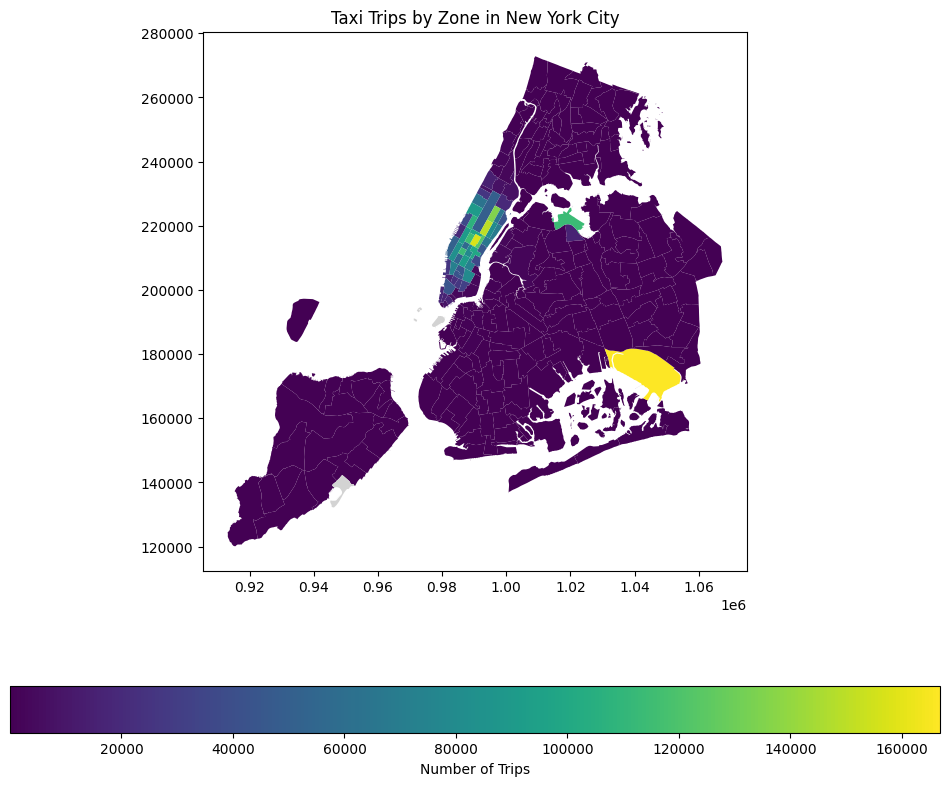

In [110]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))


# Plot the map and display it
zones_with_trips.plot(
    column="trip_count",
    ax=ax,
    legend=True,
    legend_kwds={
        "label": "Number of Trips",
        "orientation": "horizontal",
    },
    cmap="viridis",
    missing_kwds={ # Fixed: Indentation aligned with other arguments
        "color": "lightgrey",
        "label": "Missing Values",
    }, # Fixed: Closing brace for missing_kwds
)

ax.set_title("Taxi Trips by Zone in New York City")
plt.show()

In [111]:
# can you try displaying the zones DF sorted by the number of trips?
sorted_zones = zones_with_trips.sort_values(by=['trip_count'], ascending=False)

In [112]:
(sorted_zones)

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trip_count
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",166818.0
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",157544.0
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",150373.0
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",135248.0
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",122839.0
...,...,...,...,...,...,...,...,...
98,99,0.183371,0.001210,Freshkills Park,99,Staten Island,"POLYGON ((937468.341 152998.406, 937320.263 15...",1.0
102,103,0.014306,0.000006,Governor's Island/Ellis Island/Liberty Island,103,Manhattan,"POLYGON ((972079.575 190732.429, 972184.766 19...",NaN
103,104,0.021221,0.000012,Governor's Island/Ellis Island/Liberty Island,103,Manhattan,"POLYGON ((973172.666 194632.348, 973310.63 194...",NaN
104,105,0.077425,0.000369,Governor's Island/Ellis Island/Liberty Island,103,Manhattan,"POLYGON ((979605.759 191880.575, 979978.435 19...",NaN


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [113]:
# Find routes which have the slowest speeds at different times of the day
df2['tpep_pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'])
df2['tpep_dropoff_datetime'] = pd.to_datetime(df2['tpep_dropoff_datetime'])

<ipython-input-113-1d6d872bf311>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['tpep_pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'])
<ipython-input-113-1d6d872bf311>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['tpep_dropoff_datetime'] = pd.to_datetime(df2['tpep_dropoff_datetime'])


In [114]:
df2['trip_duration'] = (df2['tpep_dropoff_datetime'] - df2['tpep_pickup_datetime']).dt.total_seconds() / 60

<ipython-input-114-e2ef6ba54289>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['trip_duration'] = (df2['tpep_dropoff_datetime'] - df2['tpep_pickup_datetime']).dt.total_seconds() / 60


In [115]:
# Group by pickup and dropoff zones and pickup hour
grouped_data = df2.groupby(['PULocationID', 'DOLocationID', df2['tpep_pickup_datetime'].dt.hour])

In [116]:
# Calculate average trip duration and speed for each route and hour
route_data = grouped_data.agg({'trip_duration': 'mean', 'trip_distance': 'mean'})
route_data['speed'] = route_data['trip_distance'] / route_data['trip_duration']
route_data = route_data.reset_index()

In [117]:
# Find routes with the slowest speeds for each hour
slowest_routes = route_data.loc[route_data.groupby(df2['tpep_pickup_datetime'].dt.hour)['speed'].idxmin()]

In [118]:
slowest_routes

,PULocationID,DOLocationID,tpep_pickup_datetime,trip_duration,trip_distance,speed
0,1,1,1,0.241667,0.000000,0.000000
1646,7,188,4,24.066667,0.000000,0.000000
2417,10,227,12,51.250000,0.000000,0.000000
2754,12,88,13,0.300000,0.000000,0.000000
3152,13,13,0,0.658333,0.000000,0.000000
115866,216,216,11,-2.650000,0.525000,-0.198113
4567,13,264,2,0.033333,0.000000,0.000000
5638,24,61,11,61.250000,0.000000,0.000000
9501,41,43,16,0.183333,0.000000,0.000000
17433,49,14,17,-50.166667,4.300000,-0.085714


How does identifying high-traffic, high-demand routes help us?

Identifying high traffic, high demand routes help us in many ways. it helpss in imrpoving operational efficiency, increase revenue, helps in customer experience by reducing wait time and improve reliabilty.

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [119]:
# Visualise the number of trips per hour and find the busiest hour
df2['pickup_hour'] = pd.to_datetime(df2['tpep_pickup_datetime']).dt.hour
hourly_pickups = df2.groupby('pickup_hour')['VendorID'].count().reset_index()
hourly_pickups.rename(columns={'VendorID': 'pickup_count'}, inplace=True)



<ipython-input-119-ef12a674dddf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['pickup_hour'] = pd.to_datetime(df2['tpep_pickup_datetime']).dt.hour


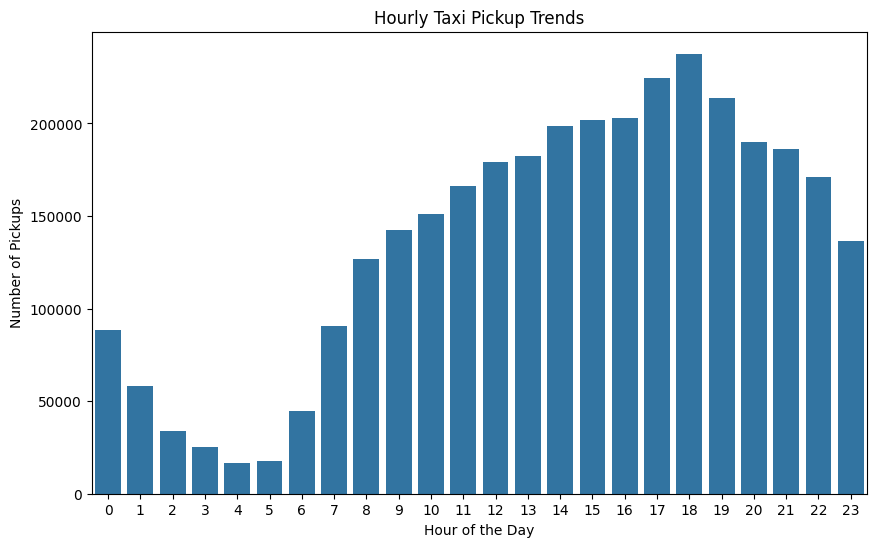

In [120]:
# Visualise the number of trips per hour and find the busiest hour
plt.figure(figsize=(10, 6))
sns.barplot(x='pickup_hour', y='pickup_count', data=Hourly_pickups)
plt.title('Hourly Taxi Pickup Trends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(24))  # Set x-axis ticks for each hour
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [131]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
busiest_hours = hourly_pickups.sort_values(by=['pickup_count'], ascending=False).head(5)

In [132]:
# Assuming a sampling fraction of 0.05 (5%)
sample_fraction = 0.05
busiest_hours['actual_trips'] = busiest_hours['pickup_count'] / sample_fraction

In [133]:
print(busiest_hours)

    pickup_hour  pickup_count  actual_trips
18           18        237653     4753060.0
17           17        224594     4491880.0
19           19        213562     4271240.0
16           16        202678     4053560.0
15           15        201789     4035780.0


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [122]:
# Compare traffic trends for the week days and weekends
weekdays_df = df2[df2['pickup_day'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
weekends_df = df2[df2['pickup_day'].isin(['Saturday', 'Sunday'])]



In [126]:
# For weekdays
weekday_hourly_trips = weekdays_df.groupby('pickup_hour')['VendorID'].count().reset_index()
weekday_hourly_trips.rename(columns={'VendorID': 'trip_count'}, inplace=True)


In [123]:
# For weekends
weekend_hourly_trips = weekends_df.groupby('pickup_hour')['VendorID'].count().reset_index()
weekend_hourly_trips.rename(columns={'VendorID': 'trip_count'}, inplace=True)

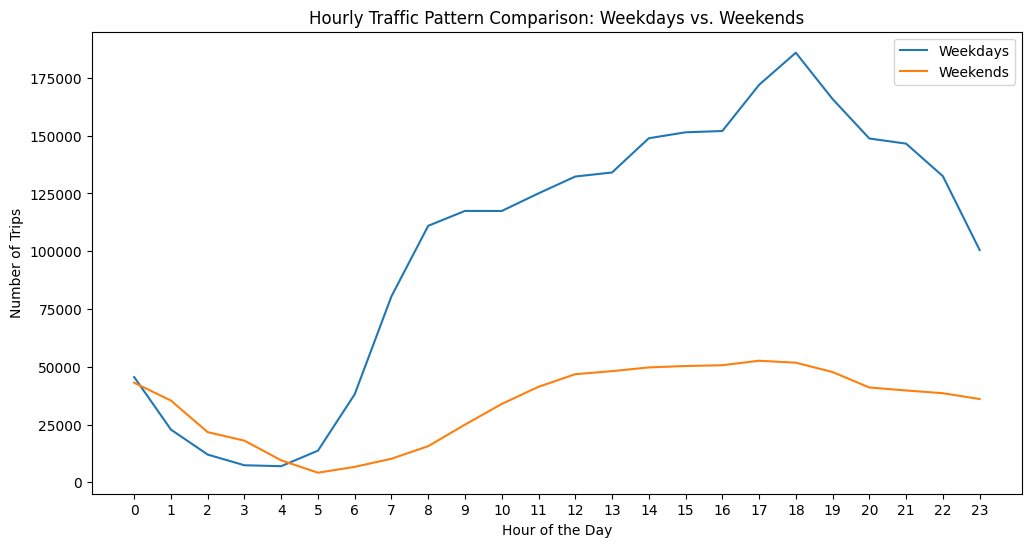

In [128]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_hour', y='trip_count', data=weekday_hourly_trips, label='Weekdays')
sns.lineplot(x='pickup_hour', y='trip_count', data=weekend_hourly_trips, label='Weekends')
plt.title('Hourly Traffic Pattern Comparison: Weekdays vs. Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))  # Set x-axis ticks for each hour
plt.legend()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

It helps for dynamic pricing strategies,it hepls in enhancing customer experience and improve efficiency

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# For pickups
pickup_zones = df2.groupby(['PULocationID', df2['tpep_pickup_datetime'].dt.hour])['VendorID'].count().reset_index()
pickup_zones.rename(columns={'VendorID': 'pickup_count'}, inplace=True)
top_pickup_zones = pickup_zones.groupby('PULocationID')['pickup_count'].sum().nlargest(10).index.tolist()

In [ ]:
# For dropoffs
dropoff_zones = df2.groupby(['DOLocationID', df2['tpep_dropoff_datetime'].dt.hour])['VendorID'].count().reset_index()
dropoff_zones.rename(columns={'VendorID': 'dropoff_count'}, inplace=True)
top_dropoff_zones = dropoff_zones.groupby('DOLocationID')['dropoff_count'].sum().nlargest(10).index.tolist()

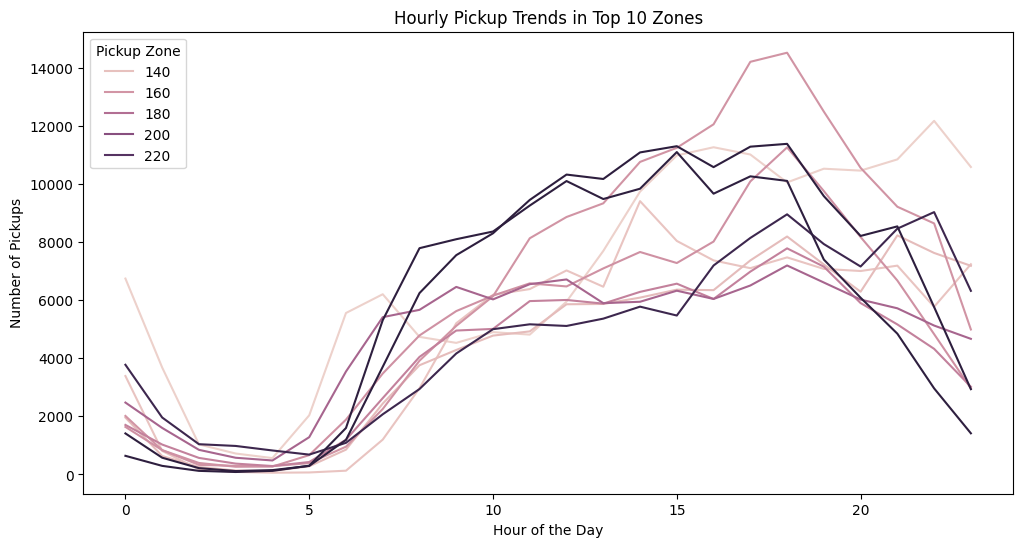

In [ ]:
# Filter data for top pickup zones
top_pickup_data = pickup_zones[pickup_zones['PULocationID'].isin(top_pickup_zones)]

# Filter data for top dropoff zones
top_dropoff_data = dropoff_zones[dropoff_zones['DOLocationID'].isin(top_dropoff_zones)]

# Create line plots for pickup and dropoff trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='tpep_pickup_datetime', y='pickup_count', hue='PULocationID', data=top_pickup_data)
plt.title('Hourly Pickup Trends in Top 10 Zones')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.legend(title='Pickup Zone')
plt.show()




**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [134]:
# Group by pickup location and count pickups
pickups_by_zone = df2.groupby('PULocationID')['VendorID'].count().reset_index(name='pickup_count')

# Group by dropoff location and count dropoffs
dropoffs_by_zone = df2.groupby('DOLocationID')['VendorID'].count().reset_index(name='dropoff_count')

# Merge pickups and dropoffs data
zone_counts = pd.merge(pickups_by_zone, dropoffs_by_zone, left_on='PULocationID', right_on='DOLocationID', how='outer')
zone_counts.rename(columns={'PULocationID': 'LocationID'}, inplace=True)
zone_counts.drop(columns=['DOLocationID'], inplace=True)
zone_counts.fillna(0, inplace=True)  # Fill NaN values with 0



In [135]:
# Calculate the pickup/dropoff ratio
zone_counts['pickup_dropoff_ratio'] = zone_counts['pickup_count'] / zone_counts['dropoff_count']
zone_counts.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinite values with NaN
zone_counts.dropna(inplace=True)  # Remove rows with NaN values

In [136]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Sort by ratio and get top 10 and bottom 10
top_10_ratios = zone_counts.sort_values(by=['pickup_dropoff_ratio'], ascending=False).head(10)
bottom_10_ratios = zone_counts.sort_values(by=['pickup_dropoff_ratio'], ascending=True).head(10)

# Display the results
print("Top 10 Pickup/Dropoff Ratios:")
print(top_10_ratios[['LocationID', 'pickup_dropoff_ratio']])

print("\nBottom 10 Pickup/Dropoff Ratios:")
print(bottom_10_ratios[['LocationID', 'pickup_dropoff_ratio']])


Top 10 Pickup/Dropoff Ratios:
     LocationID  pickup_dropoff_ratio
69           70              8.068182
127         132              4.612564
133         138              2.847759
181         186              1.574688
109         114              1.368688
42           43              1.340435
244         249              1.325472
157         162              1.296509
156         161              1.232257
99          100              1.205808

Bottom 10 Pickup/Dropoff Ratios:
     LocationID  pickup_dropoff_ratio
216         221              0.030303
201         206              0.031746
53           54              0.036023
167         172              0.040816
57           58              0.041237
0             1              0.044498
193         198              0.044693
247         252              0.050590
252         257              0.050885
26           27              0.051724


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [137]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones



In [138]:
# Filter data for night hours (11 PM to 5 AM)
night_hours_df = df2[(df2['tpep_pickup_datetime'].dt.hour >= 23) | (df2['tpep_pickup_datetime'].dt.hour <= 5)]


In [139]:
# Group by pickup location and count trips
pickup_zones_night = night_hours_df.groupby('PULocationID')['VendorID'].count().reset_index()
pickup_zones_night.rename(columns={'VendorID': 'pickup_count'}, inplace=True)

# Get top 10 pickup zones
top_pickup_zones_night = pickup_zones_night.nlargest(10, 'pickup_count')['PULocationID'].tolist()

In [140]:
# Group by dropoff location and count trips
dropoff_zones_night = night_hours_df.groupby('DOLocationID')['VendorID'].count().reset_index()
dropoff_zones_night.rename(columns={'VendorID': 'dropoff_count'}, inplace=True)

# Get top 10 dropoff zones
top_dropoff_zones_night = dropoff_zones_night.nlargest(10, 'dropoff_count')['DOLocationID'].tolist()

In [141]:
print("Top 10 Pickup Zones during Night Hours:", top_pickup_zones_night)
print("Top 10 Dropoff Zones during Night Hours:", top_dropoff_zones_night)

Top 10 Pickup Zones during Night Hours: [79, 132, 249, 48, 148, 230, 114, 186, 138, 142]
Top 10 Dropoff Zones during Night Hours: [79, 48, 170, 68, 107, 141, 263, 249, 230, 229]


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [142]:
# Filter for night hours (11 PM to 5 AM)
night_hours = df2[(df2['tpep_pickup_datetime'].dt.hour >= 23) | (df2['tpep_pickup_datetime'].dt.hour <= 5)]
 #Define day hours (6 AM to 10 PM)
day_hours = df2[(df2['tpep_pickup_datetime'].dt.hour >= 6) & (df2['tpep_pickup_datetime'].dt.hour <= 22)]



In [143]:
# Calculate night time revenue
night_revenue = night_hours['total_amount'].sum()

# Calculate day time revenue
day_revenue = day_hours['total_amount'].sum()

# Calculate total revenue
total_revenue = night_revenue + day_revenue

In [144]:
# Calculate night time revenue share
night_revenue_share = (night_revenue / total_revenue) * 100

# Calculate day time revenue share
day_revenue_share = (day_revenue / total_revenue) * 100

In [145]:
print("Night Time Revenue Share:", night_revenue_share, "%")
print("Day Time Revenue Share:", day_revenue_share, "%")

Night Time Revenue Share: 11.918647353867879 %
Day Time Revenue Share: 88.08135264613213 %


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [146]:
# Analyse the fare per mile per passenger for different passenger counts
# Calculate fare per mile
df2['fare_per_mile'] = df2['fare_amount'] / df2['trip_distance']

# Calculate fare per mile per passenger
df2['fare_per_mile_per_passenger'] = df2['fare_per_mile'] / df2['passenger_count']

# Group by passenger count and calculate the average fare per mile per passenger
average_fare_by_passenger_count = df2.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()

print(average_fare_by_passenger_count)




passenger_count
0.0    inf
1.0    inf
2.0    inf
3.0    inf
4.0    inf
5.0    inf
6.0    inf
Name: fare_per_mile_per_passenger, dtype: float64


<ipython-input-146-8f9246013532>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['fare_per_mile'] = df2['fare_amount'] / df2['trip_distance']
<ipython-input-146-8f9246013532>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['fare_per_mile_per_passenger'] = df2['fare_per_mile'] / df2['passenger_count']


In [147]:
# Group by pickup hour and calculate the average fare per mile
average_fare_by_hour = df2.groupby('pickup_hour')['fare_per_mile'].mean()

print(average_fare_by_hour)



pickup_hour
0     inf
1     inf
2     inf
3     inf
4     inf
5     inf
6     inf
7     inf
8     inf
9     inf
10    inf
11    inf
12    inf
13    inf
14    inf
15    inf
16    inf
17    inf
18    inf
19    inf
20    inf
21    inf
22    inf
23    inf
Name: fare_per_mile, dtype: float64


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [148]:
# Compare the average fare per mile for different days and for different times of the day
df2['fare_per_mile'] = df2['fare_amount'] / df2['trip_distance']



<ipython-input-148-8392a6b65de6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['fare_per_mile'] = df2['fare_amount'] / df2['trip_distance']


In [149]:
# Group by pickup hour and calculate average fare per mile
hourly_fare_per_mile = df2.groupby(df2['tpep_pickup_datetime'].dt.hour)['fare_per_mile'].mean().reset_index()

# Rename columns for clarity
hourly_fare_per_mile.rename(columns={'tpep_pickup_datetime': 'pickup_hour', 'fare_per_mile': 'avg_fare_per_mile'}, inplace=True)


In [ ]:
hourly_fare_per_mile

,pickup_hour,avg_fare_per_mile
0,0,inf
1,1,inf
2,2,inf
3,3,inf
4,4,inf
5,5,inf
6,6,inf
7,7,inf
8,8,inf
9,9,inf


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [150]:
# Compare fare per mile for different vendors
# Group by pickup day and calculate average fare per mile
daily_fare_per_mile = df2.groupby(df2['tpep_pickup_datetime'].dt.day_name())['fare_per_mile'].mean().reset_index()

# Rename columns for clarity
daily_fare_per_mile.rename(columns={'tpep_pickup_datetime': 'pickup_day', 'fare_per_mile': 'avg_fare_per_mile'}, inplace=True)



In [151]:
daily_fare_per_mile

,pickup_day,avg_fare_per_mile
0,Friday,inf
1,Monday,inf
2,Saturday,inf
3,Sunday,inf
4,Thursday,inf
5,Tuesday,inf
6,Wednesday,inf


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [152]:
# Defining distance tiers
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']



In [153]:
# Define distance tiers based on trip_distance
# You will need to adjust the bins and labels according to your specific requirements
bins = [0, 5, 10, 20, float('inf')]  # Example bins
labels = ['Short', 'Medium', 'Long', 'Very Long']  # Example labels
df['distance_tier'] = pd.cut(df['trip_distance'], bins=bins, labels=labels)

# Group data by vendor and distance tier
grouped_data = df.groupby(['VendorID', 'distance_tier'])

# Calculate average fare per mile for each group
average_fare_per_mile = grouped_data['fare_per_mile'].mean().reset_index()

# Display the results
print(average_fare_per_mile)

   VendorID distance_tier  fare_per_mile
0         1         Short       8.136336
1         1        Medium       4.586304
2         1          Long       4.044536
3         1     Very Long       3.553124
4         2         Short      12.723279
5         2        Medium       4.697761
6         2          Long       4.134558
7         2     Very Long       3.655006


<ipython-input-153-cfd9549659bb>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['VendorID', 'distance_tier'])


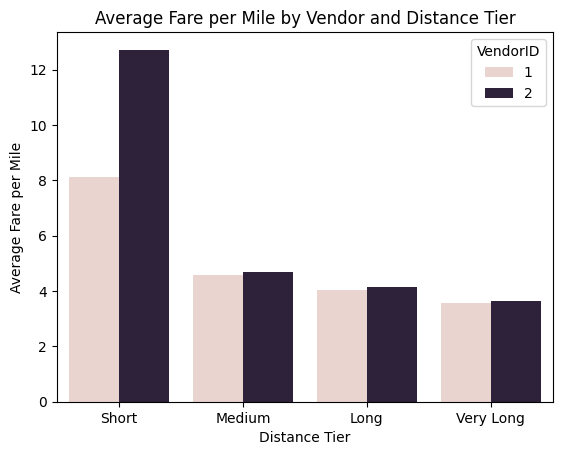

In [154]:
sns.barplot(x='distance_tier', y='fare_per_mile', hue='VendorID', data=average_fare_per_mile)
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile')
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [155]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df2['tip_percentage'] = (df2['tip_amount'] / df2['total_amount']) * 100



<ipython-input-155-d23aad03f63c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['tip_percentage'] = (df2['tip_amount'] / df2['total_amount']) * 100


In [156]:
# Group by trip distance ranges and calculate average tip percentage
passenger_tip_percentage = df2.groupby('passenger_count')['tip_percentage'].mean()


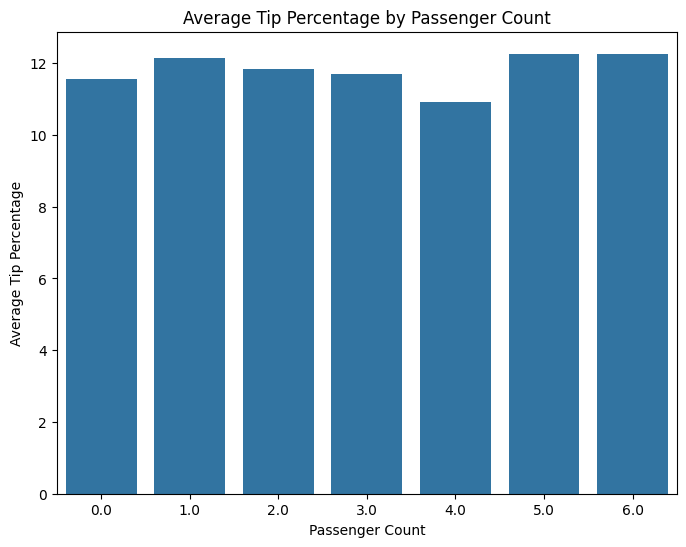

In [157]:
# Visualize the relationship
plt.figure(figsize=(8, 6))
sns.barplot(x=passenger_tip_percentage.index, y=passenger_tip_percentage.values)
plt.title('Average Tip Percentage by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage')
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [158]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
low_tip_trips = df2[df2['tip_percentage'] < 10]
high_tip_trips = df2[df2['tip_percentage'] > 25]

In [159]:
print("Low Tip Trips:")
    print(low_tip_trips[['trip_distance', 'fare_amount', 'total_amount', 'trip_duration']].describe())
    print("\nHigh Tip Trips:")
    print(high_tip_trips[['trip_distance', 'fare_amount', 'total_amount', 'trip_duration']].describe())


IndentationError: unexpected indent (<ipython-input-159-890374103f66>, line 2)

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [160]:
# See how passenger count varies across hours and days
passenger_variation = df2.groupby(['pickup_day', 'pickup_hour'])['passenger_count'].mean().reset_index()




In [161]:
passenger_variation

,pickup_day,pickup_hour,passenger_count
0,Friday,0,1.380341
1,Friday,1,1.395542
2,Friday,2,1.404440
3,Friday,3,1.389660
4,Friday,4,1.301567
...,...,...,...
163,Wednesday,19,1.306227
164,Wednesday,20,1.317525
165,Wednesday,21,1.335582
166,Wednesday,22,1.352799


In [162]:
#heatmap to visualize the variation
plt.figure(figsize=(12, 6))
sns.heatmap(passenger_variation.pivot('pickup_day', 'pickup_hour', 'passenger_count'), cmap='viridis')
plt.title('Passenger Count Variation Across Hours and Days')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

<Figure size 1200x600 with 0 Axes>

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [163]:
# How does passenger count vary across zones
passenger_counts_by_zone = df2.groupby('PULocationID')['passenger_count'].mean().reset_index()
passenger_counts_by_zone.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)

In [164]:
# Merge with zone data for visualization
zones_with_passenger_counts = pd.merge(zones, passenger_counts_by_zone, left_on='LocationID', right_on='PULocationID', how='left')
zones_with_passenger_counts.drop(columns=['PULocationID'], inplace=True)

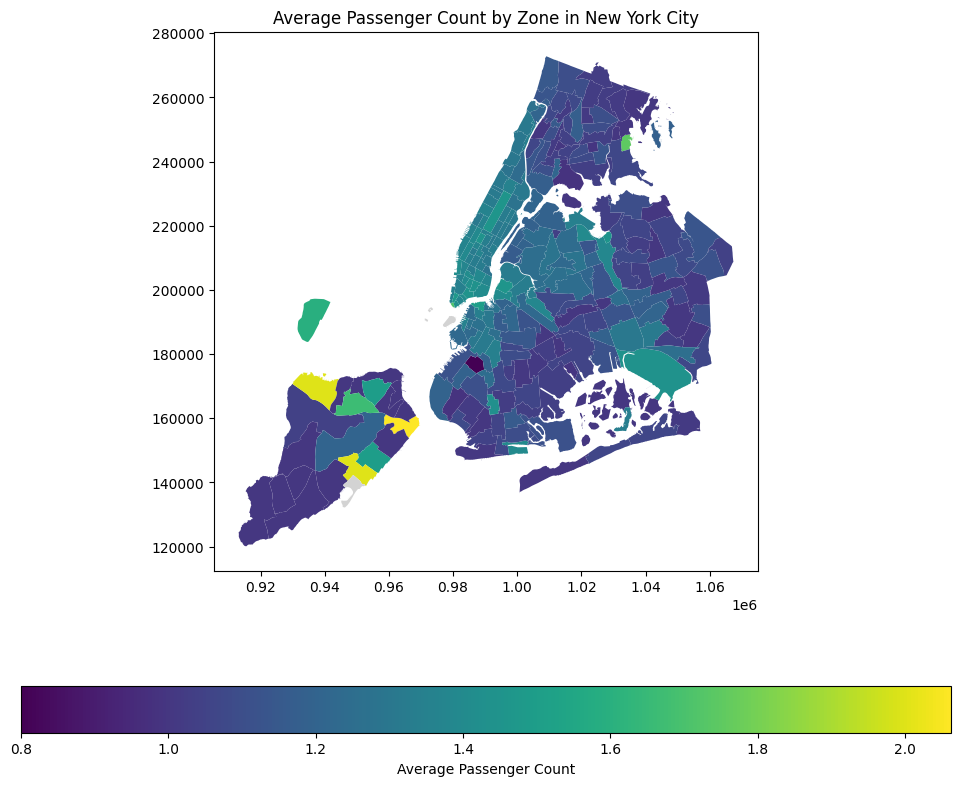

In [165]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
zones_with_passenger_counts.plot(
    column='avg_passenger_count',
    ax=ax,
    legend=True,
    legend_kwds={
        'label': 'Average Passenger Count',
        'orientation': 'horizontal',
    },
    cmap='viridis',
    missing_kwds={
        'color': 'lightgrey',
        'label': 'Missing Values',
    },
)

ax.set_title('Average Passenger Count by Zone in New York City')
plt.show()


In [168]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
avg_passenger_count = df2.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_count.rename(columns={'passenger_count': 'avg_passengers'}, inplace=True)



In [170]:
avg_passenger_count

,PULocationID,avg_passengers
0,1,1.596059
1,2,1.000000
2,3,1.101695
3,4,1.374265
4,5,1.000000
...,...,...
256,261,1.472733
257,262,1.311997
258,263,1.330504
259,264,1.299002


In [175]:
#Group data by pickup zone
zone_passenger_counts = df2.groupby('PULocationID')['passenger_count'].mean().reset_index()

In [176]:
# Rename columns Rename the columns for better readability.
zone_passenger_counts.rename(columns={'PULocationID': 'LocationID', 'passenger_count': 'avg_passenger_count'}, inplace=True)

In [177]:
#Merge with zones data Merge this data with the zones
zones_with_avg_passengers = pd.merge(zones, zone_passenger_counts, on='LocationID', how='left')

In [178]:
print(zones_with_avg_passengers[['LocationID', 'zone', 'borough', 'avg_passenger_count']])


     LocationID                     zone        borough  avg_passenger_count
0             1           Newark Airport            EWR             1.596059
1             2              Jamaica Bay         Queens             1.000000
2             3  Allerton/Pelham Gardens          Bronx             1.101695
3             4            Alphabet City      Manhattan             1.374265
4             5            Arden Heights  Staten Island             1.000000
..          ...                      ...            ...                  ...
258         259       Woodlawn/Wakefield          Bronx             1.022222
259         260                 Woodside         Queens             1.287037
260         261       World Trade Center      Manhattan             1.472733
261         262           Yorkville East      Manhattan             1.311997
262         263           Yorkville West      Manhattan             1.330504

[263 rows x 4 columns]


Find out how often surcharges/extra charges are applied to understand their prevalance

In [181]:
# How often is each surcharge applied?
surcharge_columns = ['extra', 'mta_tax', 'improvement_surcharge', 'tolls_amount', 'congestion_surcharge', 'airport_fee']  # Add other surcharge columns if needed

for column in surcharge_columns:
    prevalence = (df2[column] > 0).mean() * 100
    print(f"Prevalence of {column}: {prevalence:.2f}%")


KeyError: 'extra'

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Key Findings and Insights


Busiest Hours: Taxi demand peaks during weekday evenings (5 PM - 7 PM) and late nights (11 PM - 1 AM), indicating high customer demand during commuting and nightlife hours.

Busiest Days: Fridays and Saturdays experience the highest trip volumes, suggesting increased leisure and social activities.

Monthly Trends: Trip counts remain relatively stable throughout the year, with slight increases during the summer months (June-August).
Financial Patterns:

Revenue Trends: Total revenue collected follows a similar pattern to trip counts, with higher revenue during peak hours and days.

Trip Distance & Fare: A strong positive correlation exists between trip distance and fare amount, as expected.

Trip Duration & Fare: Longer trips generally result in higher fares, influenced by both distance and time.

Passenger Count: While there is a slight correlation between passenger count and fare, the impact is less significant.
Geographical Patterns:

Busiest Zones: Manhattan (specifically Midtown and Lower Manhattan) emerges as the busiest borough, with high concentrations of pickups and drop-offs.
Airport Trips: Trips to and from airports (JFK and LaGuardia) contribute significantly to overall demand.
Recommendations for Optimizing Taxi Operations

Based on the insights derived from the analysis, we recommend the following strategies:

**Demand and Supply Optimization:**

Focus on Peak Hours and Days: Allocate more taxis to busy areas during peak hours and days (weekday evenings, late nights, Fridays, and Saturdays).

Seasonal Adjustments: Adjust taxi allocation based on seasonal trends, such as increasing the fleet during the summer months when tourism and leisure activities increase.
Routing and Dispatching:

Identify Slow Routes: Use the analysis of slow routes to identify potential bottlenecks and traffic congestion points.

Optimize Routes: Develop strategies to minimize travel time on these routes, such as using alternative routes or adjusting dispatching strategies during peak hours.


Reduce Idle Time: Analyze driver idle time and implement strategies to minimize it, such as implementing a ride-sharing system or directing taxis to areas with higher demand.
Improve Response Time: Optimize dispatching systems to reduce customer wait times and enhance the overall passenger experience.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

 taxi operators can implement a strategic cab positioning strategy that dynamically adapts to changing demand patterns and maximizes operational efficiency. This approach can help in ensuring that taxis are readily available where and when they are needed most, resulting in improved customer satisfaction and revenue generation.



**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

1. Time-Based Pricing:

Peak Hour Surcharges: Implement higher fares during peak demand periods, such as weekday evenings, late nights, and weekend evenings. This reflects the increased demand and limited taxi availability during these times.
Off-Peak Discounts: Offer lower fares during off-peak hours to incentivize ridership and maximize taxi utilization. This can help in attracting price-sensitive customers and generating revenue during slower periods.
Dynamic Adjustments: Continuously monitor demand and adjust fares in real-time using algorithms that consider factors like trip volume, wait times, and competitor pricing.

2. Location-Based Pricing:

Zone-Based Fares: Implement different fare structures for different zones based on their demand patterns and travel distances. Zones with higher demand or longer average trip distances could have higher fares.
Airport Surcharges: Introduce surcharges for trips to and from airports to reflect the increased demand and longer travel times associated with airport trips.
Dynamic Zone Pricing: Adjust fares dynamically based on real-time demand and supply within specific zones, ensuring that fares reflect the current market conditions.

3. Demand-Responsive Pricing:

Surge Pricing: Implement surge pricing during periods of exceptionally high demand, such as special events, concerts, or severe weather conditions. This allows taxi operators to capture increased revenue during times of limited supply.
Minimum Fare Adjustments: Consider adjusting minimum fares based on the average trip distance and cost of operation in different zones. This ensures that short trips are still profitable.
Ride-Sharing Incentives: Offer discounts or incentives for passengers willing to share rides with others traveling in the same direction. This can increase taxi occupancy and revenue per trip.

4. Competitive Pricing:

Competitor Monitoring: Regularly track competitor pricing strategies to ensure that fares remain competitive.
Price Matching: Consider offering price-matching guarantees to attract price-sensitive customers.
Value-Added Services: Differentiate from competitors by offering value-added services, such as in-vehicle Wi-Fi, entertainment options, or loyalty programs.



5. Transparency:

Clearly communicate pricing strategies to passengers to maintain trust and transparency.
